# <span style="color:blue">Regressão Linear</span>
#### <span> É utilizada para prever o valor de uma variável com base no valor de outra. </span>

Tem como objetivo tratar de um valor que não se consegue estimar inicialmente.

Exemplo: Prever salário pelo tempo de experiência.

fonte  : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Quais são as bibliotecas necessárias ?
Se for necessário instalar um biblioteca o comando é: !pip install [nome biblioteca]

In [ ]:
import pandas as pd # Trabalhar com tabelas e importação dos arquivos utilizados
import plotly.express as px # Biblioteca para criar gráficos dinamicos
import seaborn as sns # Biblioteca a para gráficos
import numpy as np # Funções matemáticas de alto nivel

# Importação da base
Neste caso, a base está na mesma pasta que o arquivo .ipynb.

Caso estivesse em diretório diferente, teríamos que colocar o caminho completo.

Exemplo: C:\\\Users\\\..\\\custo_diaria.csv

Não se esqueça de indicar o separador ("sep") e o encoding (Caso necessário)

In [ ]:
custo_diaria = pd.read_csv('custo_diaria.csv', sep= ';')

## Visualização do df (dataframe) e suas estatisticas
Aqui eu coloquei algumas propriedades do Pandas para conhecer mais sobre seu df.

In [ ]:
# Visualizando arquivos da base de dados; Também pode utilizar .head
custo_diaria.head()

In [ ]:
# Algumas estatisticas de base de dados
custo_diaria.describe()

In [ ]:
# Mostra a forma do df (quantidade de linhas e colunas)
custo_diaria.shape

In [ ]:
# Indexação
custo_diaria.index

In [ ]:
# Informa o nome das colunas e o tipo
custo_diaria.columns

In [ ]:
# Retorna o tipo de dados de cada coluna
custo_diaria.dtypes

In [ ]:
# Tabela de informações sobre o df. Por aqui já conseguimos saber se está faltando dados
custo_diaria.info()

In [ ]:
# Retorna o numero de elementos no objeto
custo_diaria.size

In [ ]:
# verifica se o df está vazio
custo_diaria.empty

# Criando as variaveis que serão utilizadas no modelo

In [ ]:
# Criando a variavel independente
"""
Buscamos todos os registros da primeira coluna e convertermos no formato de array.
O comando iloc permite selecionar um conjunto de registros. Os dois pontos ":" significa que estamos selecionando todos os 
registros e zero "0" a primeira coluna.
"""
x_custo_diaria = custo_diaria.iloc[:,0].values 
x_custo_diaria

In [ ]:
# Criando variável dependente (o que queremos predizer)
y_custo_diaria = custo_diaria.iloc[:,1].values
y_custo_diaria

# Correlação de Pearson

O Coeficiente de Correlação de Pearson é uma técnica para medir se duas variáveis estão relacionadas de maneira linear. Esta técnica também pode ser chamada de r de Pearson, Correlação Produto-Momento de Pearson ou mais coloquialmente de correlação de Pearson. (fonte: https://psicometriaonline.com.br/o-que-e-correlacao-de-pearson/)

Correlação positiva: quando duas variaveis que possuem correlação crescem os decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variaveis que possuem correlação mas quando uma variavel cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variavel não tem efeito sobre outra variável.


In [ ]:
# Cria e retorna a Correlação de Person em formato de matriz
np.corrcoef(x_custo_diaria, y_custo_diaria)

In [ ]:
correlation = custo_diaria.corr()

In [ ]:
# plot da matriz de correlação
plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diaria também aumenta.

Além disso, podemos dizer que em 98% do valor cobrado pelas diarias pode ser explicado pela quantidade de pessoas alugando o imóvel.

# Tratando os dados para o modelo

Nesse passo vamos realizar transformações nos dados. Essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicitada como entrada.

In [ ]:
# Visualizar o formato da variável
x_custo_diaria.shape

In [ ]:
# Visualizando variável
x_custo_diaria #O resultado mostra que temos uma array com apenas uma coluna/dimensão. No entanto, precisamos ter uma matriz com 2 colunas.

In [ ]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

In [ ]:
# Agora nós temos uma matriz com duas colunas
x_custo_diaria.shape

# Aplicando os dados ao algoritmo de machine de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
# Cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

In [ ]:
type(previsao_custo_diaria)

# Realizando o Treinamento do Modelo

#### Relembrando

**.fit**(X, y[, sample_weight]): Ajuste o modelo linear.
* X - Dados de treinamento.
* y -Valores de destino. Será lançado para o dtype de X, se necessário.

**.intercept_:** :Termo independente no modelo linear.

**.coef_:** :
Coeficientes estimados para o problema de regressão linear.

**.predict(X)**: Preveja usando o modelo linear.

In [ ]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

In [ ]:
# Verificando a interceptação
previsao_custo_diaria.intercept_

In [ ]:
# Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

In [ ]:
previsao_preco = previsao_custo_diaria.predict(x_custo_diaria) #baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imóvel alugado.

In [ ]:
#Visualiza das previsões para cada numero de pessoas.
previsao_preco

# Visualizando no gráfico as disposições dos dados

Para visualizar os dados no grafico, temos que transoformar os valores das variaveis para o formato de vetor. Para isso utilizamos o comando ravel().

In [ ]:
# Verificando tipo da variavel x_custo_diaria
x_custo_diaria

In [ ]:
x_custo_diaria.ravel() #transforma em um vetor

In [ ]:
y_custo_diaria

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.show()

In [ ]:
grafico = px.scatter(x = x_custo_diaria.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diaria.ravel(), y = previsao_preco, name = 'previsões')
grafico.show()

In [ ]:
# Verificando os valores de um determinada previsão baseada na quantidade de pessoas
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

In [ ]:
# Verificando de modo direto
previsao_custo_diaria.predict([[27]])

In [ ]:
# Indica a qualidade do algoritmo (quando mais próximo de 1, melhor qualidade do modelo)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

In [ ]:
# Visualizando os erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_preco)

O MAE, ou Erro Absoluto Médio é a métrica mais simples de se entender. Essa métrica consiste em calcular o residual de cada ponto, onde valores residuais negativos e positivos não se anulam. Após esse agrupamento, calculamos então a média desses ‘residuais’. 
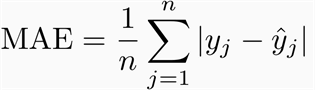

Fonte: https://medium.com/@douglasheberteempty/ml-m%C3%A9tricas-de-regress%C3%A3o-20c1ed73c7e7

In [ ]:
# Calculando MAE
mean_absolute_error(y_custo_diaria, previsao_preco)

RMSE
Uma das métricas mais comumente usadas(caraca, comumente usadas, pega essa), se não a mais utilizada, é a RMSE(Root Mean Squared Error). Também conhecida como RMSD (Root Mean Square Deviation), como o nome sugere(quase nem sugere né), é uma regra que baseia-se na “média das diferenças entre as predições e observações reais ao quadrado”.

Formulinha do rolê:

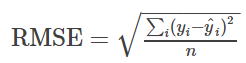

Fonte: https://medium.com/@douglasheberteempty/ml-m%C3%A9tricas-de-regress%C3%A3o-20c1ed73c7e7


In [ ]:
# Calculando RMSE
np.sqrt(MSE)

original disponibilizado por Prof Leandro Lessa https://github.com/ProfLeandroLessa/FDA-material-video-aulas

implementos Lidiane Aureliano https://github.com/laurelianox

Bootcamp DiversiData Tech Pan